<a href="https://colab.research.google.com/github/tulsip03/labs/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'}
url = 'https://richmond.craigslist.org/search/richmond-va/moa?lat=37.523&lon=-77.497&search_distance=18#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

In [2]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [27]:
import re

makes = ['iphone', 'android','samsung','nokia','google pixel','note','motorola','moto','galaxy','sonim',
          'schok', 'apple']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in makes]
    if len(hits) == 0:
        make = 'missing'
    else:
        make = hits[0]

    regex_search = re.search(r'[0-9]', title)
    if regex_search is None:
        model = np.nan
    else:
        model = regex_search.group(0)

    data.append({'title':title,'price':price,'model': model,'link':link,'manufacturer':make})

In [28]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['model'] = pd.to_numeric(df['model'],errors='coerce')

print(df.shape)
df.to_csv('craigslist_richmond_phones.csv')
df.head()

(105, 5)


,title,price,model,link,manufacturer
0,iphone 13 pro factory unlocked with ios 18,380,1.0,https://richmond.craigslist.org/mob/d/henrico-...,iphone
1,uv phone sanitizer & wireless charger,16,NaN,https://richmond.craigslist.org/mob/d/glen-all...,missing
2,hd glass screen protector new 3 pack 6.1 in ip...,2,3.0,https://richmond.craigslist.org/mob/d/glen-all...,iphone
3,"iphone se 2nd gen: 64 gb, unlocked, home butto...",100,2.0,https://richmond.craigslist.org/mob/d/midlothi...,iphone
4,"unlocked iphone 8 plus with extras: 256 gb, li...",240,8.0,https://richmond.craigslist.org/mob/d/midlothi...,iphone


count     105.000000
mean      291.495238
std       273.640982
min         0.000000
25%       100.000000
50%       250.000000
75%       400.000000
max      1300.000000
Name: price, dtype: float64


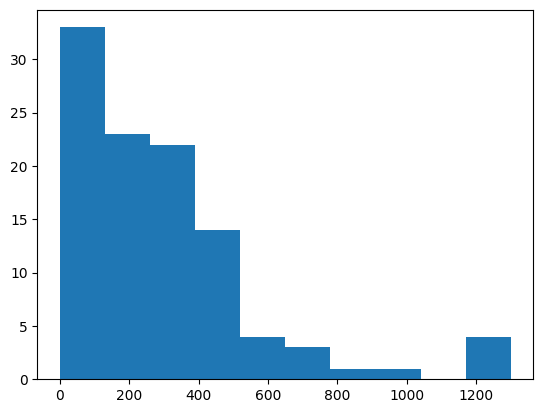

In [29]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [30]:
df.loc[:,['price','manufacturer']].groupby('manufacturer').describe()

price                                                         \
             count        mean         std    min     25%    50%      75%   
manufacturer                                                                
apple          2.0  800.000000  565.685425  400.0  600.00  800.0  1000.00   
galaxy         1.0  450.000000         NaN  450.0  450.00  450.0   450.00   
iphone        43.0  369.116279  290.483604    2.0  170.00  340.0   480.00   
missing       22.0  134.318182  131.689891    0.0   11.50  110.0   235.00   
moto           2.0   80.000000   56.568542   40.0   60.00   80.0   100.00   
motorola       3.0  113.333333   41.633320   80.0   90.00  100.0   130.00   
note           2.0  352.500000   38.890873  325.0  338.75  352.5   366.25   
samsung       26.0  327.884615  256.110027   15.0  200.00  275.0   425.00   
schok          1.0    0.000000         NaN    0.0    0.00    0.0     0.00   
sonim          3.0    0.000000    0.000000    0.0    0.00    0.0     0.00   

                      
                 max  
manufacturer          
apple         1200.0  
galaxy         450.0  
iphone        1200.0  
missing        425.0  
moto           120.0  
motorola       160.0  
note           380.0  
samsung       1300.0  
schok            0.0  
sonim            0.0

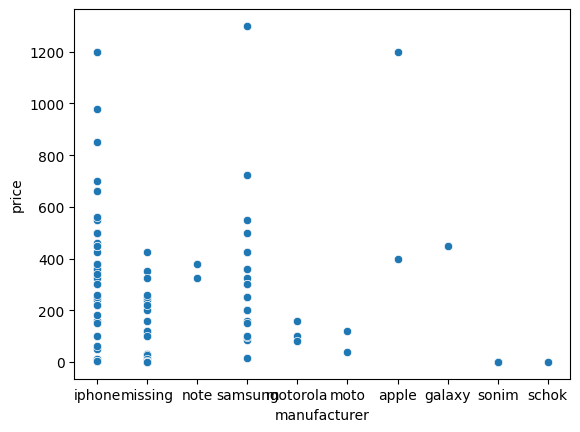

In [31]:
ax = sns.scatterplot(data=df, x='manufacturer', y='price')